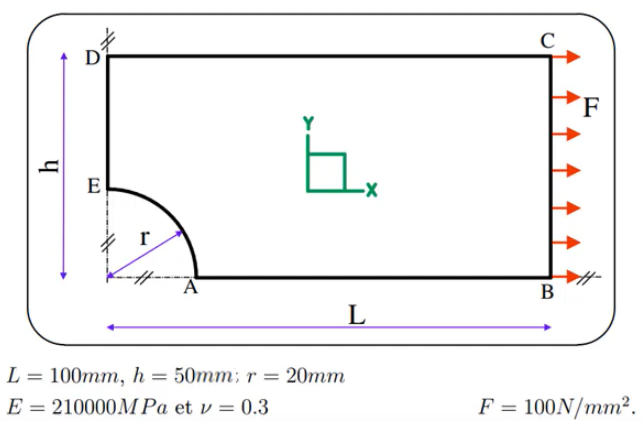

In [23]:
##import libraries
from stl import mesh
import numpy
import matplotlib.pyplot as plt
import math

[[  0.          10.        ]
 [  0.          10.81632653]
 [  0.          11.63265306]
 ...
 [100.          47.95918367]
 [100.          48.97959184]
 [100.          50.        ]]


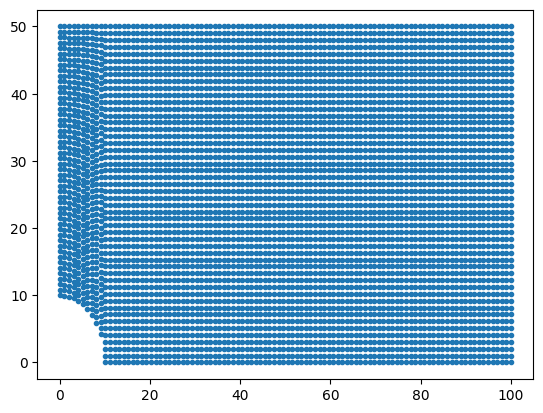

In [24]:
##Plate Dimensions
L=100
W=50
T=5
R=10
LD=100
WD=50

##initilize 
Nodes=[]

##Generate nodes with in domain
for x in numpy.linspace(0,L,LD):
    y0=math.sqrt(abs((R**2)-(x**2)))
    if (x<R):
        for y in numpy.linspace(y0,W,WD):
            Nodes.append([x,y])
    else:
        for y in numpy.linspace(0,W,WD):
            Nodes.append([x,y])

##Convert nodes into array
Node=numpy.array(Nodes)

print(Node)
#display nodes
plt.plot(Node[:,0],Node[:,1],'.')
plt.show()

In [25]:
## create elements using Delauny triangulation
from scipy.spatial import Delaunay
tri=Delaunay(Node)

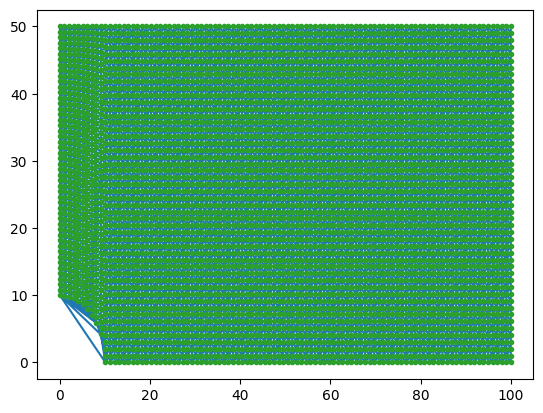

In [26]:
plt.triplot(Node[:,0],Node[:,1],tri.simplices)
plt.plot(Node[:,0],Node[:,1],".")
plt.show()

In [27]:
## create points on circle of diameter 9.75
p=[]
r2=9.9

for i in numpy.linspace(0,r2,50):
    p.append([i,math.sqrt(abs((r2**2)-(i**2)))])

p1=[]
r3=8
for i in numpy.linspace(0,r3,20):
   p1.append([i,math.sqrt(abs((r3**2)-(i**2)))])

p.extend(p1)

a=tuple(tri.find_simplex(p))
tri.find_simplex(p)


array([  -1,  997,  997,  997,  997,  997,  997, 1000, 1000, 1000, 1000,
       1000,  999,  999,  999,  999,  999,  994,  994,  994,  994,  994,
        996,  996,  996,  996,  996,  996,  998,  998,  998,  998,  998,
        998,  993,  993,  993,  998,  996,  997,  995,  995,  995,  995,
        995,    0,   36,   36,   36,   -1,   -1,   -1,   -1,   -1,   -1,
         -1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,   -1], dtype=int32)

In [28]:
##delete the unwanted elements
Mesh_Grid=numpy.delete(tri.simplices,a,0)

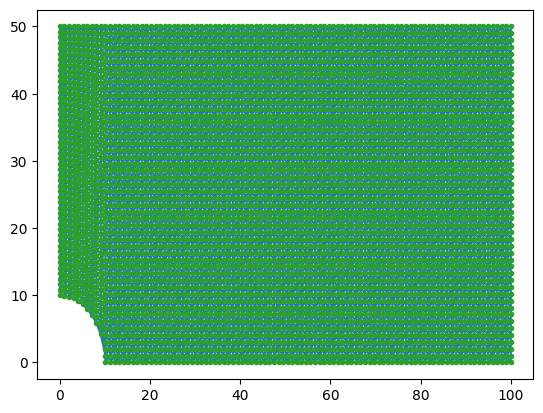

In [29]:
## Display Mesh after deleting the unwanted elements
plt.triplot(Node[:,0],Node[:,1],Mesh_Grid)
plt.plot(Node[:,0],Node[:,1],".")
plt.show()

In [30]:
## Node and element count
print(len(Node))
print(len(Mesh_Grid))

5000
9700


In [31]:
### export it into .dat file

file=open("E:\\plate_mesh_cs.csv",'w')
file.write('{},{},{},{}\n'.format("ID","x","y","z"))
#write nodes
for i,eachnode in enumerate(Node):
    file.write("{},{},{},{}\n".format(i,eachnode[0],eachnode[1],0))
#write elements
for j,element in enumerate(Mesh_Grid):
    file.write("{},{},{},{}\n".format(j,element[0],element[1],element[2]))
    
file.close()

In [32]:
## add z coordinate in Node
for i in Nodes:
    i.append(0)
    #print(i)
print(Nodes)
#print(type(Nodes))

[[np.float64(0.0), np.float64(10.0), 0], [np.float64(0.0), np.float64(10.816326530612244), 0], [np.float64(0.0), np.float64(11.63265306122449), 0], [np.float64(0.0), np.float64(12.448979591836736), 0], [np.float64(0.0), np.float64(13.26530612244898), 0], [np.float64(0.0), np.float64(14.081632653061224), 0], [np.float64(0.0), np.float64(14.89795918367347), 0], [np.float64(0.0), np.float64(15.714285714285715), 0], [np.float64(0.0), np.float64(16.53061224489796), 0], [np.float64(0.0), np.float64(17.346938775510203), 0], [np.float64(0.0), np.float64(18.163265306122447), 0], [np.float64(0.0), np.float64(18.979591836734695), 0], [np.float64(0.0), np.float64(19.79591836734694), 0], [np.float64(0.0), np.float64(20.612244897959183), 0], [np.float64(0.0), np.float64(21.42857142857143), 0], [np.float64(0.0), np.float64(22.244897959183675), 0], [np.float64(0.0), np.float64(23.06122448979592), 0], [np.float64(0.0), np.float64(23.877551020408163), 0], [np.float64(0.0), np.float64(24.693877551020407)

In [33]:
##export as stl
import numpy as np

vertices=np.array(Nodes)
plate=mesh.Mesh(np.zeros(Mesh_Grid.shape[0],dtype=mesh.Mesh.dtype))
for i,m in enumerate(Mesh_Grid):
    for j in range(3):
        plate.vectors[i][j]=vertices[m[j],:]
plate.save("E:\\plate_quater_mesh.stl")